# <center> <font face="Times New Roman"> Statistics of Bird Migration </font></center>

<center> <font face="Times New Roman"> Gracy Whelihan, vgw3869@nyu.edu </font></center> 
<center> <font face="Times New Roman"> Sheeran Yan, zy2053@nyu.edu </font></center>

## <font face="Times New Roman">Read Data</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**<font face="Times New Roman">read data from text file</font>**

In [4]:
txt_migration = open("data/ebird_US-NY__2018_2022_1_12_barchart.txt", "r")

**<font face="Times New Roman">parse data from text file line by line</font>**

In [5]:
dict_migration = dict()
for line in txt_migration:
    line_list = line.split("\t")
    if line_list != ['\n'] and len(line_list) > 2: 
        dict_migration[line_list[0]] = line_list[1:-1]

**<font face="Times New Roman">create DataFrame</font>**

In [6]:
df_migration = pd.DataFrame(dict_migration)
df_migration.rename(columns={'': 'week'}, inplace=True)

**<font face="Times New Roman">data preprocessing</font>**

In [7]:
# preprocess week
for i in range(len(df_migration.week)):
    if df_migration.week.iloc[i] == '':
        preprocessed_data = df_migration.week.iloc[i - 1].split('_')[0] + '_' + str(i % 4 + 1)
        df_migration.week.iloc[i] = preprocessed_data
    else:
        df_migration.week.iloc[i] = df_migration.week.iloc[i] + '_' + '1'

In [8]:
# lower column name 
df_migration.columns = [col.lower() for col in df_migration.columns]

# set month_week as index
df_migration.set_index('week', inplace=True)

# coerce type string to type float
df_migration = df_migration.astype(float)

Q: Sum of freq is not equal to 1?

In [9]:
df_migration.head()

,sample size:,black-bellied whistling-duck,bar-headed goose,emperor goose,snow goose,ross's goose,snow x ross's goose (hybrid),snow/ross's goose,graylag goose,swan goose,...,rose-breasted/black-headed grosbeak,blue grosbeak,indigo bunting,painted bunting,passerina sp.,dickcissel,saffron finch,lined seedeater,passerine sp.,bird sp.
week,,,,,,,,,,,,,,,,,,,,,
Jan_1,37552.0,0.0,0.0,0.0,0.015259,0.001278,0.000107,0.000027,0.000346,0.000000,...,0.0,0.0,0.000000,0.002583,0.0,0.000586,0.0,0.0,0.002769,0.001198
Jan_2,28892.0,0.0,0.0,0.0,0.015818,0.002457,0.000000,0.000069,0.000554,0.000104,...,0.0,0.0,0.000035,0.000762,0.0,0.000000,0.0,0.0,0.002631,0.001454
Jan_3,28728.0,0.0,0.0,0.0,0.018101,0.000940,0.000070,0.000035,0.000696,0.000070,...,0.0,0.0,0.000000,0.000174,0.0,0.000278,0.0,0.0,0.002437,0.001497
Jan_4,36388.0,0.0,0.0,0.0,0.015637,0.000330,0.000028,0.000028,0.000660,0.000028,...,0.0,0.0,0.000000,0.000192,0.0,0.000330,0.0,0.0,0.002886,0.001731
Feb_1,24973.0,0.0,0.0,0.0,0.008689,0.000440,0.000000,0.000000,0.000521,0.000040,...,0.0,0.0,0.000000,0.000080,0.0,0.000040,0.0,0.0,0.002683,0.001602


In [10]:
df_migration.iloc[:, 1:].sum(axis=1)

week
Jan_1     9.159297
Jan_2     9.319545
Jan_3     9.083794
Jan_4     9.416475
Feb_1     9.455987
Feb_2     9.230669
Feb_3     9.127353
Feb_4    10.020435
Mar_1    10.529089
Mar_2    11.409025
Mar_3    12.245959
Mar_4    13.026477
Apr_1    14.204073
Apr_2    15.426450
Apr_3    15.782701
Apr_4    17.444542
May_1    21.042463
May_2    21.034638
May_3    22.201697
May_4    19.487371
Jun_1    17.649118
Jun_2    16.794873
Jun_3    16.663230
Jun_4    16.198320
Jul_1    16.056846
Jul_2    15.962849
Jul_3    15.382836
Jul_4    15.174115
Aug_1    15.017642
Aug_2    14.712904
Aug_3    14.767961
Aug_4    14.810223
Sep_1    14.905105
Sep_2    15.465551
Sep_3    16.364896
Sep_4    16.405303
Oct_1    16.296695
Oct_2    15.640356
Oct_3    14.627236
Oct_4    14.298301
Nov_1    13.066403
Nov_2    12.294925
Nov_3    11.644721
Nov_4    10.982113
Dec_1    10.499183
Dec_2    10.156316
Dec_3    10.174231
Dec_4     9.858404
dtype: float64

## <font face="Times New Roman">Statistics</font>
TODO: describe  
TODO: correlation matrix  
..

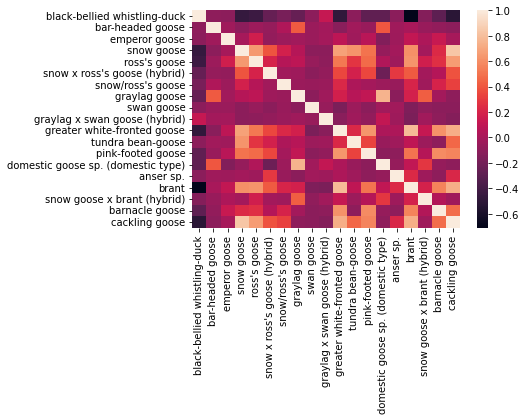

In [13]:
# calculate the correlation matrix
corr = df_migration.iloc[:, 1:20].corr()

# plot the heatmap
sns.heatmap(
    corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns
)
plt.show()

## <font face="Times New Roman">Clusters</font>
TODO: K-means  
..